# INTRODUCTION:

Sentiment Analysis using text is the field of research in Natural Language Processing (NLP) that helps to identify the sentiments of the human being such as positive, negative, or neutral. It is basically a multi-class classification problem using text. It allows organizations to identify public sentiment towards certain words or topics. 

## OBJECTIVE:

The objective of this sentiment analysis project is to detect people's opinion on Social Media Platforms and determine what kind of insights we can gain from them. 
The project will carry out the following tasks:

1. It will segment the tweet into three categories: positive, negative or neutral
2. Determine the polarity and sujectivity of the tweet
3. Exploratory Data Analysis

## DATASET:

The dataset is a number of recent tweets gathered from Twitter regarding the covid 19 vaccines. We will use Selenium, which is a web scraping tool, to extract the tweets we need for this project.

# GET DATA

The extracted data has been saved in a csv file so, we will convert it into a pandas dataframe.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Tweets.csv')
df

,Unnamed: 0,tweets
0,0,"""AI, NOSSA, O MERCADO""\n\no mercado me parece ..."
1,1,This Canva new update will transform your enti...
2,2,$AITX Calling all social media enthusiasts! He...
3,3,The Hardest Photo On Social Media Right Now.\n...
4,4,oi gente! to disponível pra trabalho freelance...
...,...,...
102,102,No longer interested in dating people from soc...
103,103,"That's it, folks, another Brexit milestone rea..."
104,104,I don’t have any context but I've been told to...
105,105,Q1 - We like to show off where we live (and wh...


There seems to be an unnecessary column so we are going to drop that. 

In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,tweets
0,"""AI, NOSSA, O MERCADO""\n\no mercado me parece ..."
1,This Canva new update will transform your enti...
2,$AITX Calling all social media enthusiasts! He...
3,The Hardest Photo On Social Media Right Now.\n...
4,oi gente! to disponível pra trabalho freelance...


# DATA Preprocessing

At first glance, there are a lot of characters like "@","#","$" in the dataset, which is common when it comes to tweets. So, for more accurate analysis we will carry out the following steps:

1. Remove Stop Words (a, am, the, are, in, etc)
2. Lower Casing: Convert each letter to lowercase.
3. Replace URLs: Links starting with 'http' or 'https' or 'www' are replaced by '<url>'.
4. Replace Usernames: Replace @Usernames with word '<user>'. [eg: '@user' to '<user>'].
5. Replace Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. [eg: 'Heyyyy' to 'Heyy']
6. Replace Emojis: Replace emojis by using a regex expression. [eg: ':)' to '<smile>']
7. Replace Contractions: Replacing contractions with their meanings. [eg: "can't" to 'can not']
8. Remove Non-Alphabets: Replacing characters except Digits, Alphabets and pre-defined Symbols with a space

In [4]:
pd.options.display.max_colwidth=1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ruchi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruchi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#defining stop words
stopWords = stopwords.words('english')

# Defining regex patterns
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z]" 
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

# Defining regex for emojis
smileemoji        = r"[8:=;]['`\-]?[)d]+"
sademoji          = r"[8:=;]['`\-]?\(+"
neutralemoji      = r"[8:=;]['`\-]?[\/|l*]"
lolemoji          = r"[8:=;]['`\-]?p+"

In [7]:
def TweetCleaning(tweet):
    
    cleanTweet = tweet.lower()
    cleanTweet = re.sub(urlPattern,'<url>', cleanTweet)                 # Replace all URls with '<url>'
    cleanTweet = re.sub(userPattern,'<user>', cleanTweet)               # Replace @USERNAME to '<user>'
    cleanTweet = re.sub(sequencePattern, seqReplacePattern, cleanTweet) # Replace 3 or more consecutive letters by 2 letter.                                                        
    cleanTweet = re.sub(r'<3', '<heart>', cleanTweet)                   # Replace all emojis.
    cleanTweet = re.sub(smileemoji, '<smile>', cleanTweet)
    cleanTweet = re.sub(sademoji, '<sadface>', cleanTweet)
    cleanTweet = re.sub(neutralemoji, '<neutralface>', cleanTweet)
    cleanTweet = re.sub(lolemoji, '<lolface>', cleanTweet)
    cleanTweet = re.sub(alphaPattern, ' ', cleanTweet)                  #Remove non-alphanumeric and symbols
    cleanTweet= ' '.join(word for word in cleanTweet.split() if word not in stopWords)
    return cleanTweet



In [8]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df

,tweets,cleanedTweets
0,"""AI, NOSSA, O MERCADO""\n\no mercado me parece tranquilão sendo que a gente acabou de sair de um golpe de estado",ai nossa mercado mercado parece tranquil sendo que gente acabou de sair de um golpe de estado
1,This Canva new update will transform your entire freelance journey. \n\n#learnontwitter #thesocialmediaoga,canva new update transform entire freelance journey learnontwitter thesocialmediaoga
2,$AITX Calling all social media enthusiasts! Help us improve our outreach by completing this short survey. Your input is invaluable! #SocialMedia #Survey #Feedback,aitx calling social media enthusiasts help us improve outreach completing short survey input invaluable socialmedia survey feedback
3,The Hardest Photo On Social Media Right Now.\n\nVote Gbadebo Rhodes-Vivour For Governor Of Lagos State. #ItusilẹEko,hardest photo social media right vote gbadebo rhodes vivour governor lagos state itusil eko
4,"oi gente! to disponível pra trabalho freelancer de social media, caso vocês conheçam alguém que estiver precisando podem me indicar! \n\nmeu Behance: http://behance.net/whittelab\nmeu gmail: whittelab@hotmail.com\n\nabaixo um exemplo de freela que eu fiz pra Sociedade Beneficente 13M",oi gente dispon vel pra trabalho freelancer de social media caso voc conhe algu que estiver precisando podem indicar meu behance url gmail whittelab user abaixo um exemplo de freela que eu fiz pra sociedade beneficente
...,...,...
102,"No longer interested in dating people from social media, bump into my arm or something at the coffee shop Like Damn",longer interested dating people social media bump arm something coffee shop like damn
103,"That's it, folks, another Brexit milestone reached - I now have some Brexiters on social media telling me that ""Brexit is only bad because Boris negotiated a terrible deal with the EU."" I knew we'd get here eventually, I just didn't think it would be this soon.",folks another brexit milestone reached brexiters social media telling brexit bad boris negotiated terrible deal eu knew get eventually think would soon
104,I don’t have any context but I've been told to reply with this picture @kfcbarstool twitter.com/kfcbarstool/st…,context told reply picture user twitter com kfcbarstool st
105,Q1 - We like to show off where we live (and where the business is based) with regular Social Media Posts. It's very photogenic here.\n\n#SBSWinnersHour,q like show live business based regular social media posts photogenic sbswinnershour


Lets drop the oiginal tweets now that we have cleaned them.

In [9]:
df.drop(['tweets'], axis = 1, inplace = True)

# Sentiment Analysis

In [10]:
from textblob import TextBlob

In [11]:
#polarity calculation
def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

#subjectivity calculation
def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity
    
#segment on the basis of polarity
def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [21]:
df['Polarity'] = df['cleanedTweets'].apply(calPolarity)
df['Subjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['Sentiment'] = df['Polarity'].apply(segmentation)
df.head(30)

,cleanedTweets,Polarity,Subjectivity,Sentiment
0,ai nossa mercado mercado parece tranquil sendo que gente acabou de sair de um golpe de estado,0.000000,0.000000,neutral
1,canva new update transform entire freelance journey learnontwitter thesocialmediaoga,0.068182,0.539773,positive
2,aitx calling social media enthusiasts help us improve outreach completing short survey input invaluable socialmedia survey feedback,0.016667,0.183333,positive
3,hardest photo social media right vote gbadebo rhodes vivour governor lagos state itusil eko,0.159524,0.301190,positive
4,oi gente dispon vel pra trabalho freelancer de social media caso voc conhe algu que estiver precisando podem indicar meu behance url gmail whittelab user abaixo um exemplo de freela que eu fiz pra sociedade beneficente,0.033333,0.066667,positive
5,cloutnews reported jimin rumored attending dior show paris fashion week rumors social media dior may planning bring park jimin bts kim jisoo blackpink jung haein together dior show paris fashion week,0.033333,0.066667,positive
6,user new single flowers announcement gathered million views teasers social media,0.032756,0.245166,positive
7,top notch social media editing skills rafa ig,0.266667,0.283333,positive
8,social media ruined dating ur sleeping men care u,0.033333,0.066667,positive
9,dont ever watch social media thinking know something dont,0.033333,0.066667,positive


# Keyword Extraction

In [34]:
#positive tweets
pos_tweets = df[df.Sentiment=='positive']['cleanedTweets']
#tokenization
pos_tokens = [token for line in pos_tweets  for token in line.split()]
pos_tokens

['canva',
 'new',
 'update',
 'transform',
 'entire',
 'freelance',
 'journey',
 'learnontwitter',
 'thesocialmediaoga',
 'aitx',
 'calling',
 'social',
 'media',
 'enthusiasts',
 'help',
 'us',
 'improve',
 'outreach',
 'completing',
 'short',
 'survey',
 'input',
 'invaluable',
 'socialmedia',
 'survey',
 'feedback',
 'hardest',
 'photo',
 'social',
 'media',
 'right',
 'vote',
 'gbadebo',
 'rhodes',
 'vivour',
 'governor',
 'lagos',
 'state',
 'itusil',
 'eko',
 'oi',
 'gente',
 'dispon',
 'vel',
 'pra',
 'trabalho',
 'freelancer',
 'de',
 'social',
 'media',
 'caso',
 'voc',
 'conhe',
 'algu',
 'que',
 'estiver',
 'precisando',
 'podem',
 'indicar',
 'meu',
 'behance',
 'url',
 'gmail',
 'whittelab',
 'user',
 'abaixo',
 'um',
 'exemplo',
 'de',
 'freela',
 'que',
 'eu',
 'fiz',
 'pra',
 'sociedade',
 'beneficente',
 'cloutnews',
 'reported',
 'jimin',
 'rumored',
 'attending',
 'dior',
 'show',
 'paris',
 'fashion',
 'week',
 'rumors',
 'social',
 'media',
 'dior',
 'may',
 'plann

In [36]:
#negative tweets
neg_tweets = df[df.Sentiment=='negative']['cleanedTweets']
#tokenization
neg_tokens = [token for line in neg_tweets for token in line.split()]
neg_tokens

['minutes',
 'damar',
 'hamlin',
 'collapsed',
 'conspiracy',
 'theorists',
 'anti',
 'vaxxers',
 'flooded',
 'twitter',
 'covid',
 'disinformation',
 'conspiracy',
 'theories',
 'covid',
 'disinformation',
 'dangerous',
 'desperately',
 'need',
 'legislation',
 'address',
 'disinformation',
 'social',
 'media',
 'platforms',
 'dmk',
 'taking',
 'social',
 'media',
 'ground',
 'posters',
 'serious',
 'politics',
 'getoutravi',
 'anti',
 'vaxxers',
 'furiously',
 'lashing',
 'grim',
 'stories',
 'anti',
 'vax',
 'influencers',
 'tragically',
 'died',
 'covid',
 'circulate',
 'social',
 'media',
 'groups',
 'depend',
 'disinformation',
 'say',
 'extremely',
 'upset',
 'real',
 'stories',
 'used',
 'combat',
 'disinformation',
 'auspol',
 'case',
 'biden',
 'administration',
 'blatant',
 'disregard',
 'first',
 'amendment',
 'attorneys',
 'general',
 'released',
 'docs',
 'showing',
 'say',
 'user',
 'pressure',
 'campaign',
 'facebook',
 'censor',
 'content',
 'including',
 'video',
 'us

# Data Visualization

In [55]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

import spacy
from spacy import displacy
from collections import Counter

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

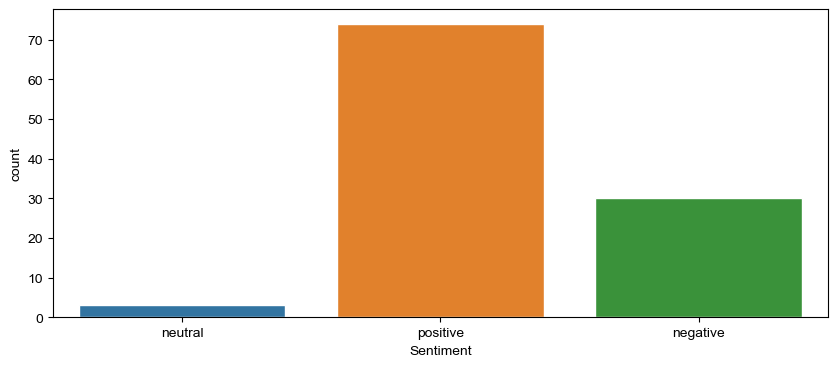

In [16]:
#countplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.set_style('whitegrid')
sns.countplot(data=df, x='Sentiment')

### 

<AxesSubplot: xlabel='Polarity', ylabel='Subjectivity'>

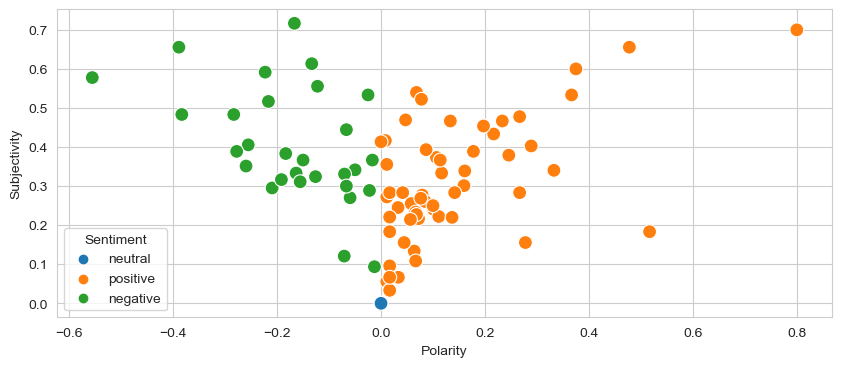

In [17]:
#scatterplot
fig, ax = plt.subplots(figsize=(10, 4))
sns.set_style('whitegrid')
sns.scatterplot(data=df, x='Polarity', y='Subjectivity', s=100, hue ='Sentiment')

### Wordcloud of positive words used

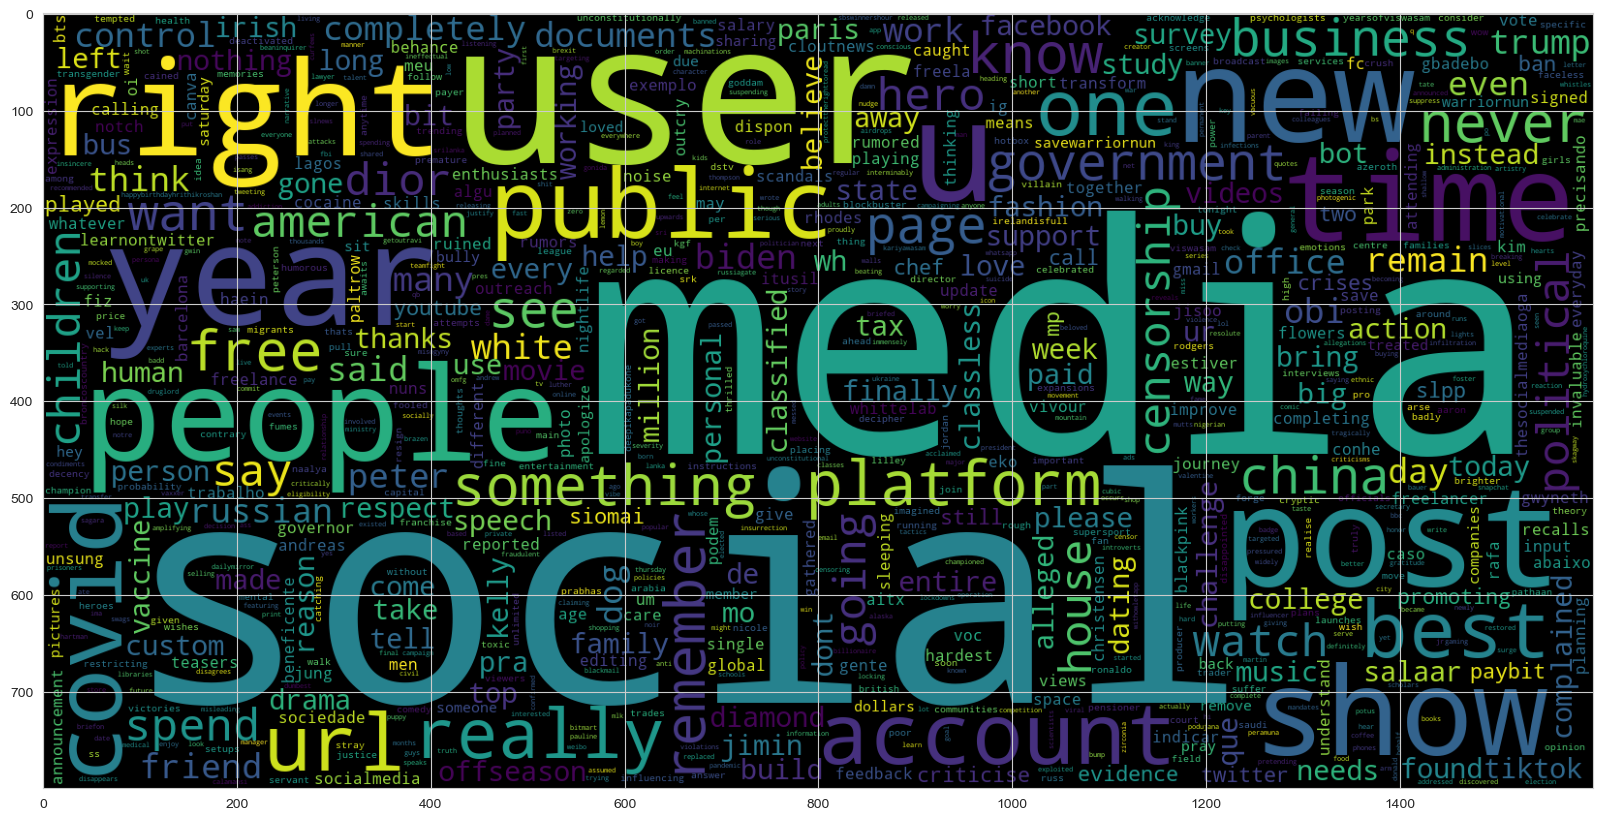

In [18]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(pos_tweets))
plt.figure(figsize = (20,20))
plt.imshow(wc)

###  Wordcloud of negative words used

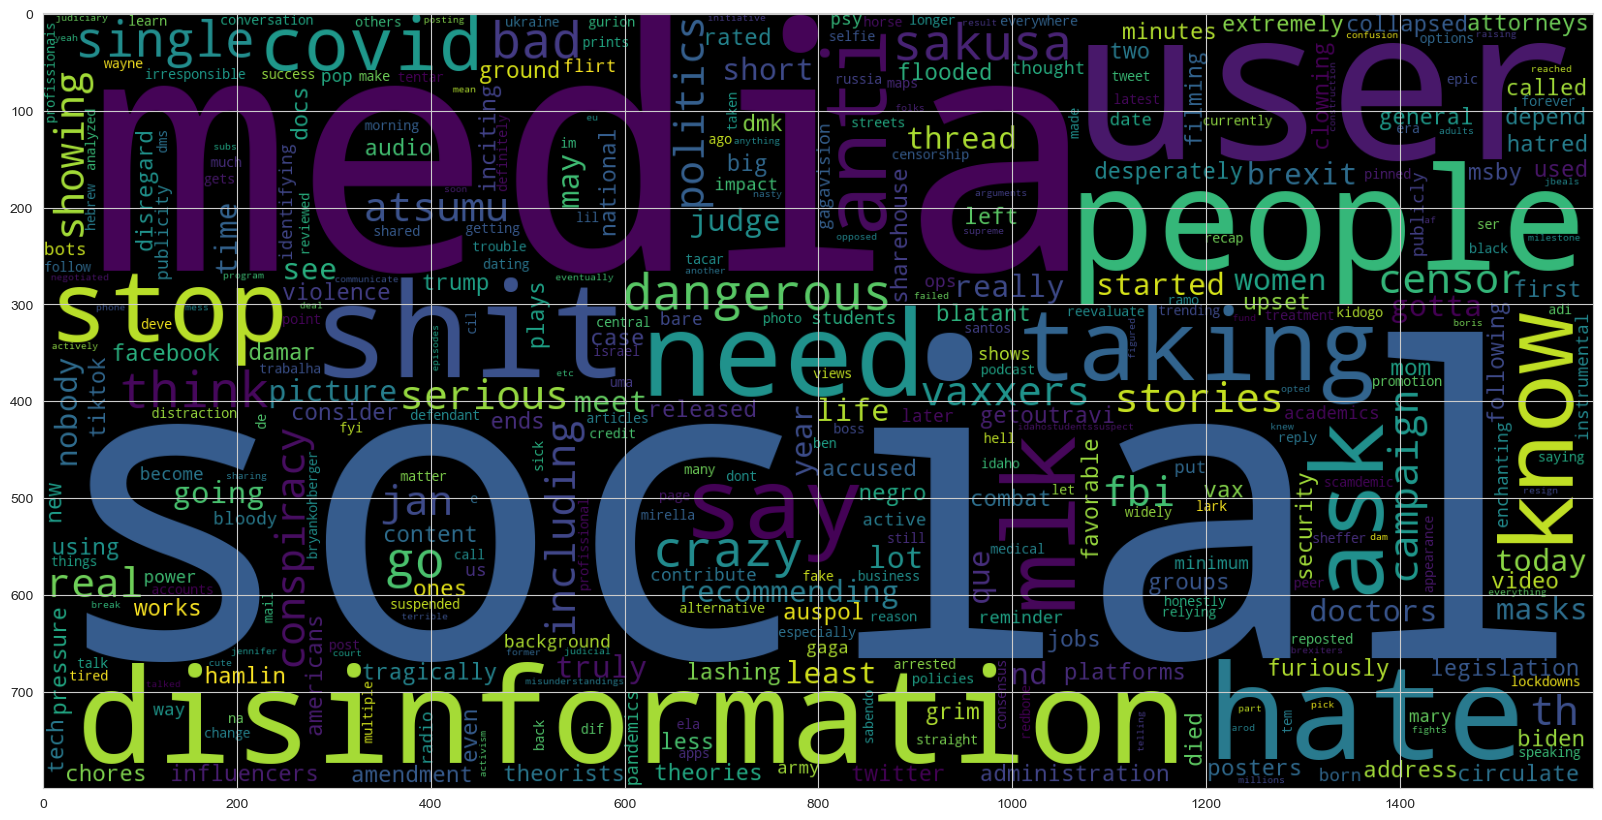

In [19]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(neg_tweets))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### Top Positive Words

In [ ]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)

In [44]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
pos_df.head()

,words,scores
0,media,73
1,social,70
2,user,18
3,get,7
4,people,7


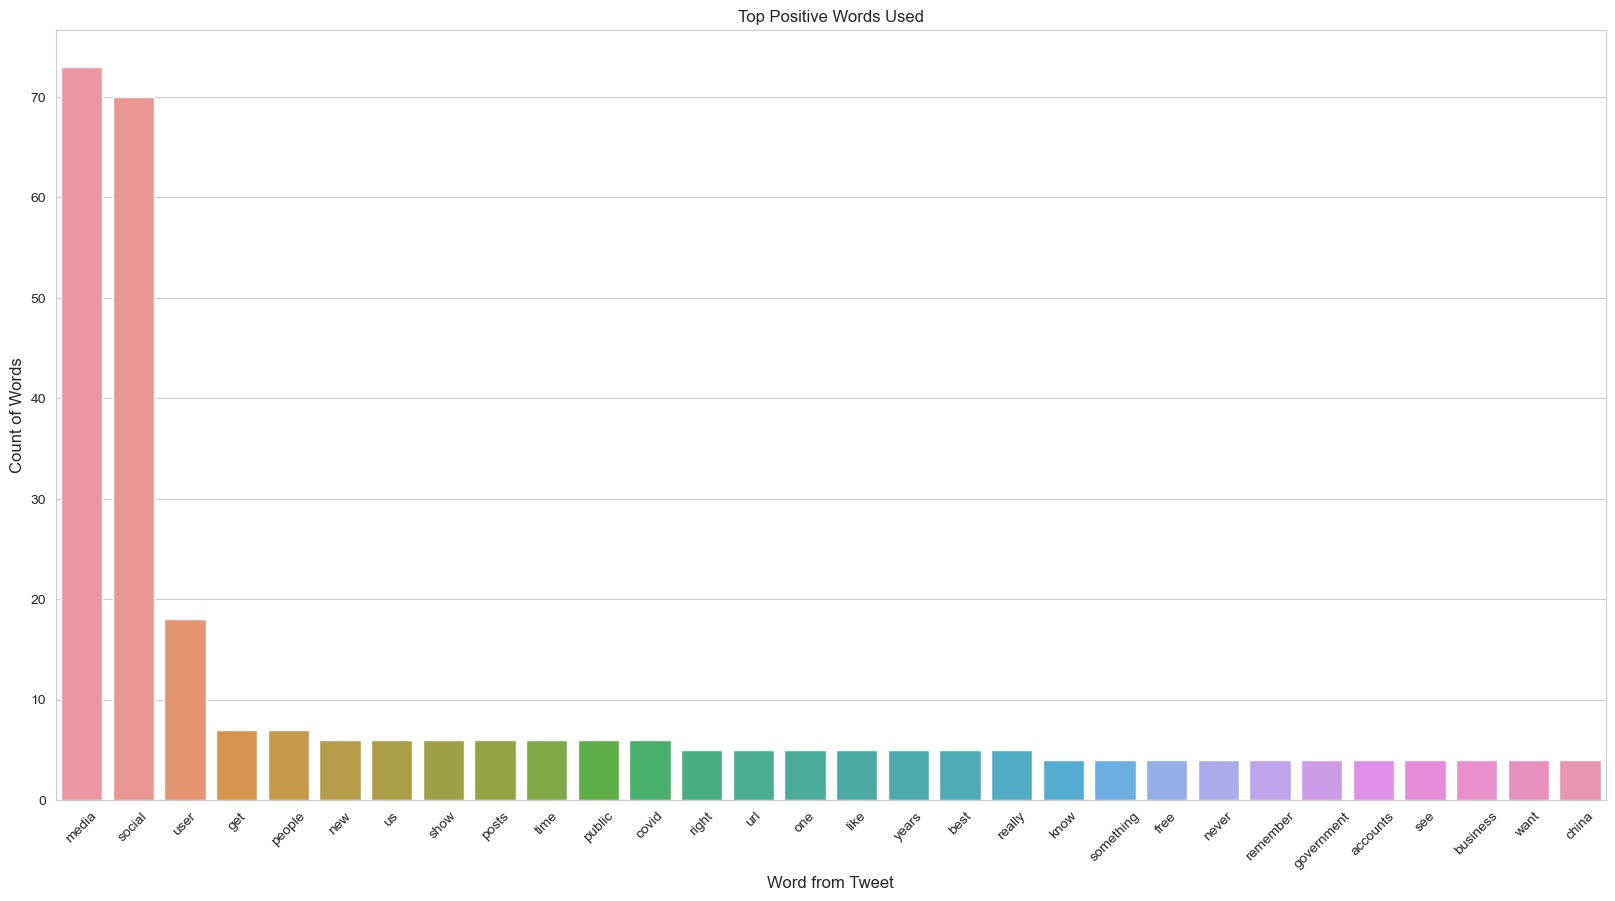

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.title('Top Positive Words Used')
plt.xlabel('Word from Tweet', fontsize=12)
plt.ylabel('Count of Words', fontsize=12)
plt.show()
plt.show()

### Top five negative tweets

In [46]:
most_common_neg_words = get_tokens(neg_tokens)

In [47]:
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df.head()

,words,scores
0,social,27
1,media,27
2,user,7
3,people,6
4,disinformation,5


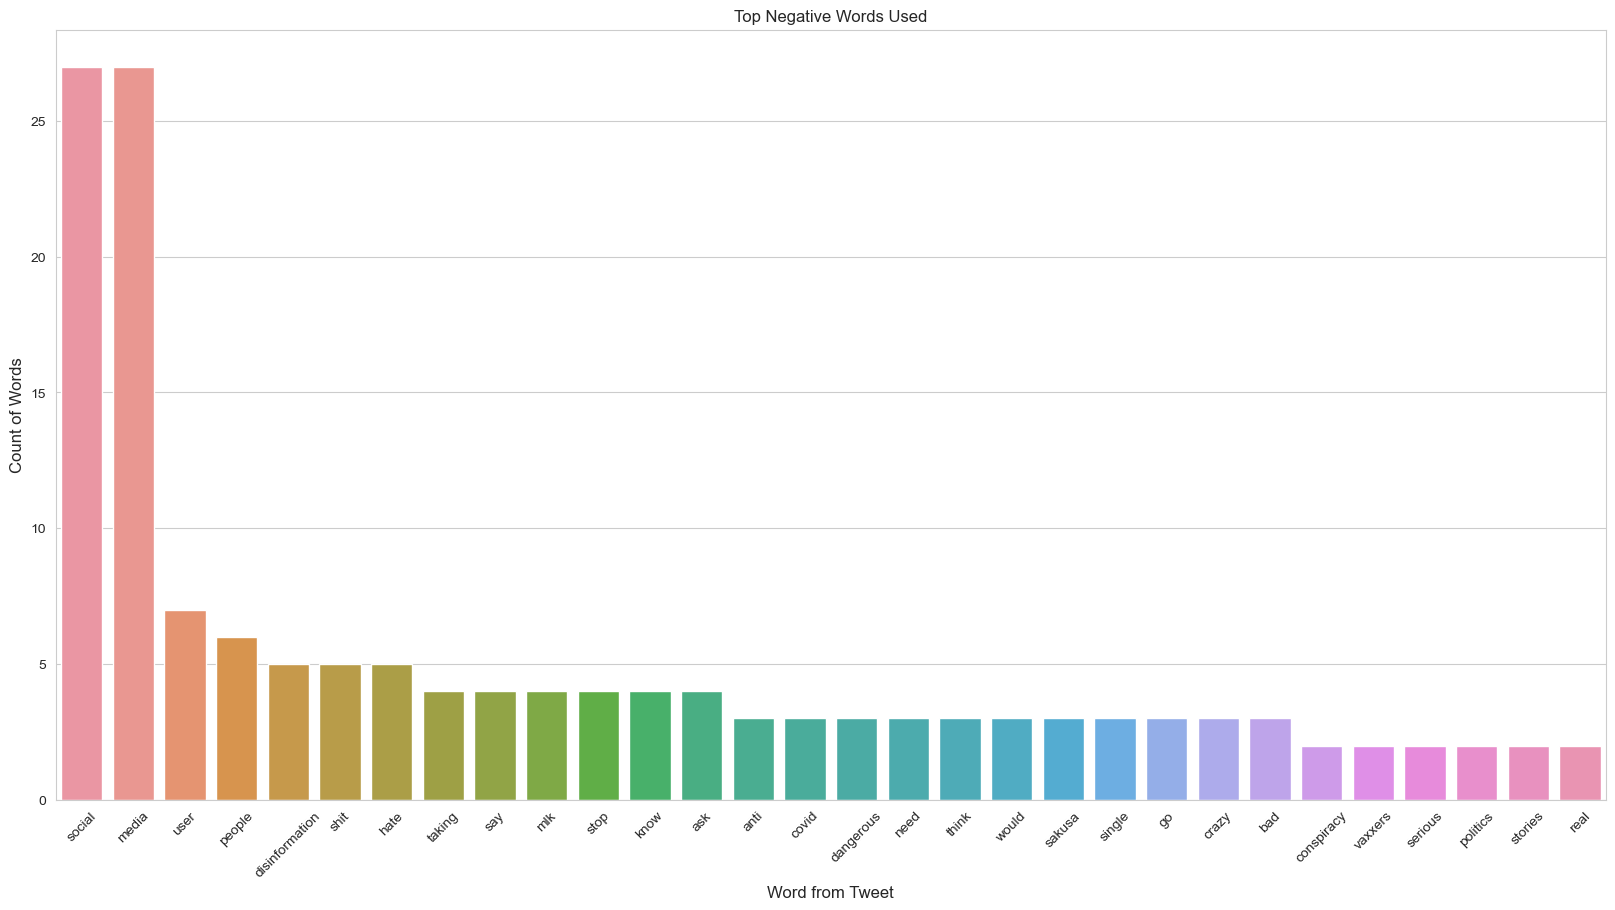

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.title('Top Negative Words Used')
plt.xlabel('Word from Tweet', fontsize=12)
plt.ylabel('Count of Words', fontsize=12)
plt.show()